In [1]:
#mount you google drive environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#modify path where you put your csv file on your PC
path = '/content/drive/MyDrive/Colab Notebooks/CSCE5300/project/'

##import data from 2014

In [3]:
f_2014 = ['uber-raw-data-apr14.csv','uber-raw-data-may14.csv','uber-raw-data-jun14.csv','uber-raw-data-jul14.csv','uber-raw-data-aug14.csv','uber-raw-data-sep14.csv']
m_2014 = ['April', 'May', 'June', 'July', 'August', 'September']
df_2014=[]
for i in range(len(f_2014)):
  df = pd.read_csv(path+f_2014[i], encoding='Iso-8859-1')
  print('size of {0}: {1}'.format(m_2014[i], len(df.index)))
  df_2014.append(df)

print("\n")
df_2014[0].head(5)


size of April: 564516
size of May: 652435
size of June: 663844
size of July: 796121
size of August: 829275
size of September: 1028136




,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


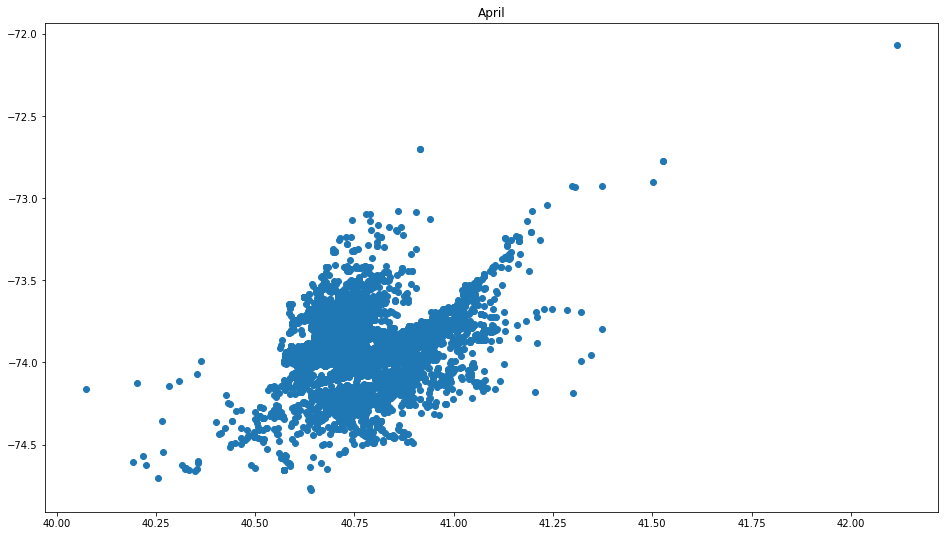

In [26]:
#fig, ax = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
month = ['April', 'May', 'June', 'July', 'August', 'September']
#for i in range(len(df_2014)):
for i in range(1):
  plt.figure(figsize=(16,9))
  lat = df_2014[i]['Lat'].values
  lon = df_2014[i]['Lon'].values
  plt.scatter(lat, lon)
  plt.title(month[i])
  plt.show()

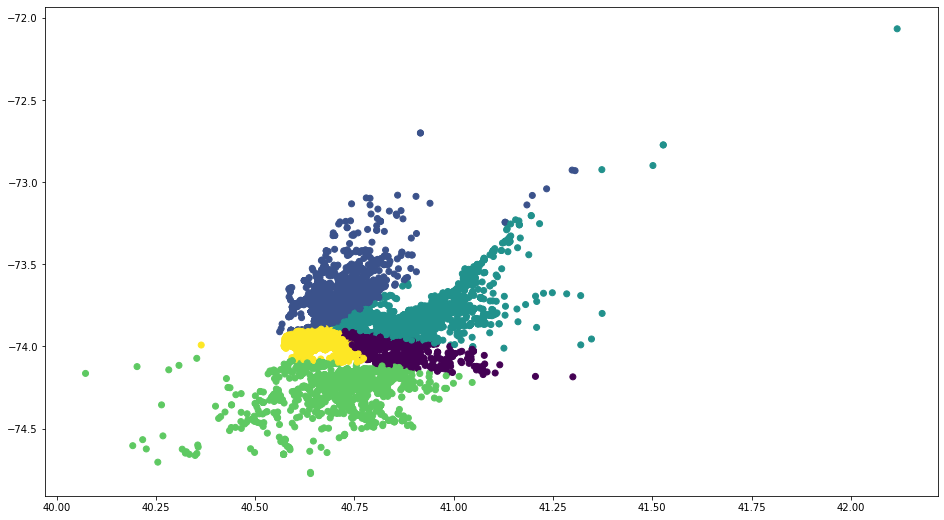

In [36]:
from sklearn.cluster import KMeans
from numpy import random, float

K = 5

lat = df_2014[0]['Lat'].values
lon = df_2014[0]['Lon'].values

lat_r = lat.reshape(len(lat), 1)
lon_r = lon.reshape(len(lon), 1)
cord = np.concatenate((lat_r, lon_r), 1)

model = KMeans(n_clusters=K)
model = model.fit(cord)

plt.figure(figsize=(16, 9))
plt.scatter(cord[:, 0], cord[:, 1], c=model.labels_.astype(float))
plt.show()

In [ ]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
geolocator = Nominatim(user_agent="UBER")

In [ ]:
import re
for i in df_2014:
    h = []
    d = []
    dnt = i['Date/Time'].values
    for j in dnt:
        res = re.split('/| |:', j)
        h.append(int(res[3]))
        d.append(int(res[1]))
    i['Day'] = d
    i['Hour'] = h


In [ ]:
df_2014[0].head(5)

,Date/Time,Lat,Lon,Base,Day,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,1,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,1,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,1,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,1,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,1,0


In [ ]:
map1 = folium.Map(
    location=[40.71, -74.00],
    tiles='cartodbpositron',
    zoom_start=10
)
#marker_cluster = MarkerCluster("UBER Cluster").add_to(map1)
x = df_2014[0]['Lat'][:100].values
y = df_2014[0]['Lon'][:100].values

for i in range(100):
  folium.Marker([x[i], y[i]]).add_to(map1)

#folium.Marker([40.769, -73.954], popup="<i>Mt. Hood Meadows</i>", tooltip='click me').add_to(map1)
#folium.Marker([x, y], popup="<i>Mt. Hood Meadows</i>", tooltip='click me').add_to(map1)

#df_2014[0].apply(lambda row:folium.Marker(location=[40, -73]).add_to(map1), axis=1)
map1

In [ ]:
'''
map1 = folium.Map(
    location=[59.338315,18.089960],
    tiles='cartodbpositron',
    zoom_start=12,
)
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1
'''

'''
lat = df_2014[0]['Lat'].values
lon = df_2014[0]['Lon'].values
print(lat, lon)

loc = geolocator.geocode(lat[0]+", "+lon[0])
print(loc)
'''

['40.769' '40.7267' '40.7316' ... '40.7443' '40.6756' '40.688'] ['-73.9549' '-74.0345' '-73.9873' ... '-73.9889' '-73.9405' '-73.9608']
400, East 74th Street, Upper East Side, Lenox Hill, Manhattan, New York County, New York, 10021, United States


In [ ]:
df_2014[0].head(5)

,Date/Time,Lat,Lon,Base,Day,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,1,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,1,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,1,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,1,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,1,0


In [ ]:
h_size = np.array([[0]*24]*6)
for i in range(len(df_2014)):
  for j in range(24):
    size = len(df_2014[i][df_2014[i]['Hour'] == j])
    h_size[i, j] = size
print(h_size)

[[11910  7769  4935  5040  6095  9476 18498 24924 22843 17939 17865 18774
  19425 22603 27190 35324 42003 45475 43003 38923 36244 36964 30645 20649]
 [13875  8186  5372  5946  6945 10789 21015 27413 25460 20507 20801 22055
  23595 27699 34363 43087 49127 51508 48965 42387 40731 42217 35556 24836]
 [14514  9167  6189  6937  7701 11955 22030 30834 29771 24298 23584 24155
  25233 28937 34428 41586 48162 50452 45013 38203 40108 40791 35614 24182]
 [17953 11527  8562  9199 10040 14932 23456 32545 33387 28486 28558 30120
  30900 35832 41357 46053 52403 58260 57268 52332 51859 49528 42218 29346]
 [21451 14471 10105 10376 11774 16525 24907 34064 34566 30195 30706 31778
  32106 35764 40644 48197 53481 57122 55390 53008 51674 51354 46008 33609]
 [24133 16107 10702 10789 12675 20262 33307 43314 44477 38542 37634 38821
  39193 45042 52643 61219 68224 73373 75040 69660 63988 60606 51817 36568]]


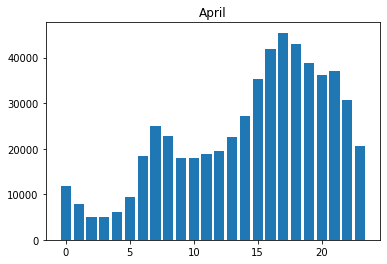

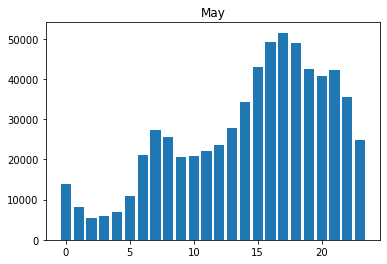

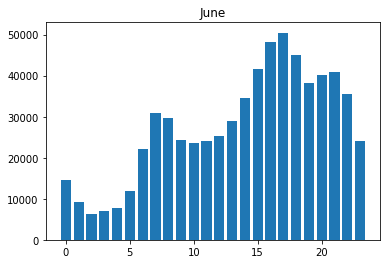

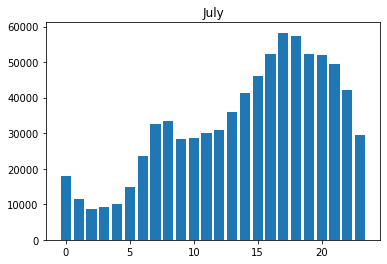

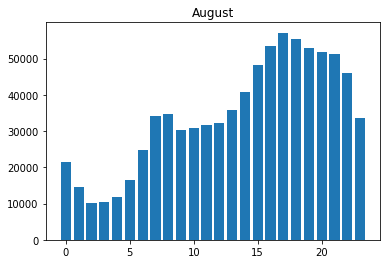

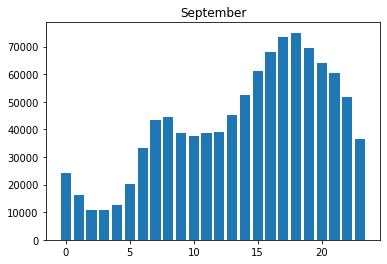

In [ ]:
for i in range(6):
  plt.bar(range(24), h_size[i])
  plt.title(m_2014[i])
  plt.show()

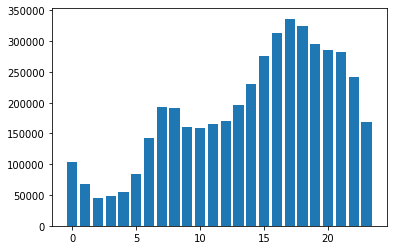

In [ ]:
summary_h = np.sum(h_size, axis=0)
#print(summary_h)
plt.bar(range(24), summary_h)
plt.show()

[ 564516  652435  663844  796121  829275 1028136]


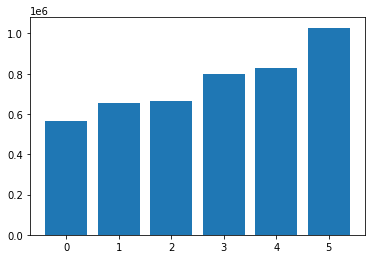

In [ ]:
summary_m = np.sum(h_size, axis = 1)
print(summary_m)
plt.bar(range(6), summary_m)
plt.show()

## 2015 dataset

In [3]:
#import 2015 uber data, the amount of size is nearly 14 millions
f_2015 = ['uber-raw-data-janjune-15.csv']
df_2015=[]
for i in f_2015:
    df_2015.append(pd.read_csv(path+i, encoding='Iso-8859-1'))
    print('size : {0}'.format(len(df_2015[0].index)))
df_2015[0]

size : 14270479


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [4]:
f_agg = ['other-FHV-services_jan-aug-2015.csv', 'Uber-Jan-Feb-FOIL.csv']
df_agg=[]
for i in f_agg:
    df_agg.append(pd.read_csv(path+i, encoding='Iso-8859-1'))

df_agg[1]

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [5]:
#get rid of useless column
#Dispatching_base_num: code of TLC company that dispathes uber, nominal data
#Pickup_date: the date and time pick up passenger, numerical data
#locatinoID: id for different location, the lookup table is "location_lookup.cvs". there are 265 locations in NY
df_2015_wo = df_2015[0].drop(['Affiliated_base_num'], axis=1)
df_2015_wo

,Dispatching_base_num,Pickup_date,locationID
0,B02617,2015-05-17 09:47:00,141
1,B02617,2015-05-17 09:47:00,65
2,B02617,2015-05-17 09:47:00,100
3,B02617,2015-05-17 09:47:00,80
4,B02617,2015-05-17 09:47:00,90
...,...,...,...
14270474,B02765,2015-05-08 15:43:00,186
14270475,B02765,2015-05-08 15:43:00,263
14270476,B02765,2015-05-08 15:43:00,90
14270477,B02765,2015-05-08 15:44:00,45


In [6]:
# extract day, hour, month information from "Pickup_date" to new column
import re

h = []
d = []
m = []
dnt = df_2015_wo['Pickup_date'].values
for j in dnt:
  res = re.split('-| |:', j)
  h.append(int(res[3]))
  d.append(int(res[2]))
  m.append(int(res[1]))
df_2015_wo['Day'] = d
df_2015_wo['Hour'] = h
df_2015_wo['Month'] = m

df_2015_wo

,Dispatching_base_num,Pickup_date,locationID,Day,Hour,Month
0,B02617,2015-05-17 09:47:00,141,17,9,5
1,B02617,2015-05-17 09:47:00,65,17,9,5
2,B02617,2015-05-17 09:47:00,100,17,9,5
3,B02617,2015-05-17 09:47:00,80,17,9,5
4,B02617,2015-05-17 09:47:00,90,17,9,5
...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,186,8,15,5
14270475,B02765,2015-05-08 15:43:00,263,8,15,5
14270476,B02765,2015-05-08 15:43:00,90,8,15,5
14270477,B02765,2015-05-08 15:44:00,45,8,15,5


In [7]:
#get unique information from locationID, Day, Hour, Month 
loc_2015 = np.unique(df_2015_wo['locationID'].values)
d_2015 = np.unique(df_2015_wo['Day'].values)
h_2015 = np.unique(df_2015_wo['Hour'].values)
m_2015 = np.unique(df_2015_wo['Month'].values)

print(loc_2015)
print(d_2015)
print(h_2015)
print(m_2015)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 25

In [8]:
#get the number of TLC company that work for UBER, there are eight
tlc_code_2015 = np.unique(df_2015[0]['Dispatching_base_num'].values)
tlc_code_2015

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764', 'B02765',
       'B02835', 'B02836'], dtype=object)

In [9]:
#for i in tlc_code_2015:
print(df_agg[1][df_agg[1]['dispatching_base_number'] == 'B02764'])

    dispatching_base_number       date  active_vehicles  trips
2                    B02764   1/1/2015             3427  29421
11                   B02764   1/2/2015             3147  19974
17                   B02764   1/3/2015             3215  29729
23                   B02764   1/4/2015             2862  20441
27                   B02764   1/5/2015             3387  20926
30                   B02764   1/6/2015             3473  25301
38                   B02764   1/7/2015             3603  29949
46                   B02764   1/8/2015             3831  33802
50                   B02764   1/9/2015             3820  33517
58                   B02764  1/10/2015             3558  38864
63                   B02764  1/11/2015             3186  27681
66                   B02764  1/12/2015             3499  26852
76                   B02764  1/13/2015             3658  29983
78                   B02764  1/14/2015             3736  29550
88                   B02764  1/15/2015             3840

In [10]:
#location ID lookup table
loc_lookup_df = pd.read_csv(path+'location_lookup.cvs')
loc_lookup_df = loc_lookup_df.drop(['Unnamed: 0'], axis=1)
zone_dict = loc_lookup_df['Zone'].to_dict()
loc_lookup_df

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,Unknown


In [11]:

#loc_lookup_df.iloc[loc_cnt_2015.index(loc_max_cnt[i])-1]['Zone']

In [12]:
#count all trips in 2015 by each TLC company
tlc_trips_2015 = []
for i in range(len(tlc_code_2015)):
  tlc_trips_2015.append(len(df_2015_wo[df_2015_wo['Dispatching_base_num']==tlc_code_2015[i]].index))
print(tlc_code_2015)
print(tlc_trips_2015)

['B02512' 'B02598' 'B02617' 'B02682' 'B02764' 'B02765' 'B02835' 'B02836']
[255772, 1526660, 2068525, 3484530, 5753653, 1152727, 26622, 1990]


In [13]:
!pip install squarify

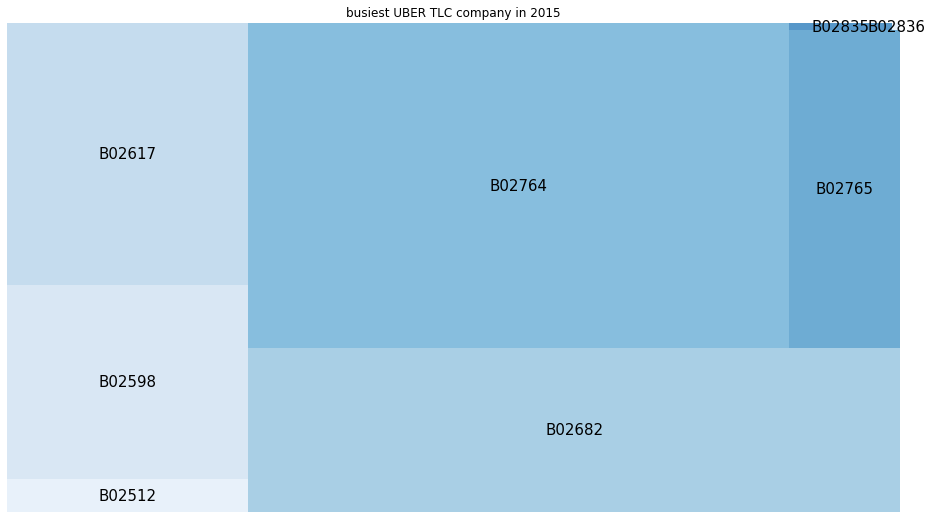

In [14]:
#visualization for 8 company's trips in 2015
#it show the information about the portion of customers of each company
import squarify
from matplotlib import cm
from collections import OrderedDict
tlc_df = pd.DataFrame({'x': tlc_trips_2015, 'y':tlc_code_2015})

plt.figure(figsize=(16, 9))
squarify.plot(sizes=tlc_df['x'], label=tlc_df['y'], alpha=.8, text_kwargs={'fontsize':15}, color=cm.get_cmap('Blues')([list(np.arange(.1, .8, .1))][0]))

plt.axis('off')
plt.title("busiest UBER TLC company in 2015")
plt.show()

In [15]:
#separate dataframe by month and assign to df_by_m
df_by_m = []
for i in range(1, 7):
  df_by_m.append(df_2015_wo[df_2015_wo['Month'] == i])

df_by_m[0]

,Dispatching_base_num,Pickup_date,locationID,Day,Hour,Month
336,B02598,2015-01-18 15:44:45,243,18,15,1
337,B02598,2015-01-18 05:13:29,107,18,5,1
338,B02598,2015-01-18 15:36:13,170,18,15,1
339,B02598,2015-01-18 00:02:54,144,18,0,1
340,B02598,2015-01-18 17:55:53,211,18,17,1
...,...,...,...,...,...,...
14239253,B02765,2015-01-04 13:35:16,249,4,13,1
14239254,B02765,2015-01-04 01:47:41,114,4,1,1
14239255,B02765,2015-01-04 19:27:16,224,4,19,1
14239256,B02765,2015-01-04 16:50:50,25,4,16,1


In [16]:
#get trips of each company by each month and put in base_every_m
#there are total 8*6 data. 0~7 is January for each 8 company...and so on
base_every_m = []
for i in range(6):
  for j in range(8):
    base_every_m.append(len(df_by_m[i][df_by_m[i]['Dispatching_base_num'] == tlc_code_2015[j]].index))
print(base_every_m)
print(len(base_every_m))

[46216, 251620, 354848, 299371, 944507, 57239, 0, 0, 54692, 285622, 386767, 371094, 1027330, 138115, 0, 0, 50065, 252211, 348538, 430120, 959768, 219071, 0, 0, 14388, 243488, 326930, 544313, 919556, 232162, 0, 0, 45446, 251846, 331883, 840476, 968730, 257172, 0, 0, 44965, 241873, 319559, 999156, 933762, 248968, 26622, 1990]
48


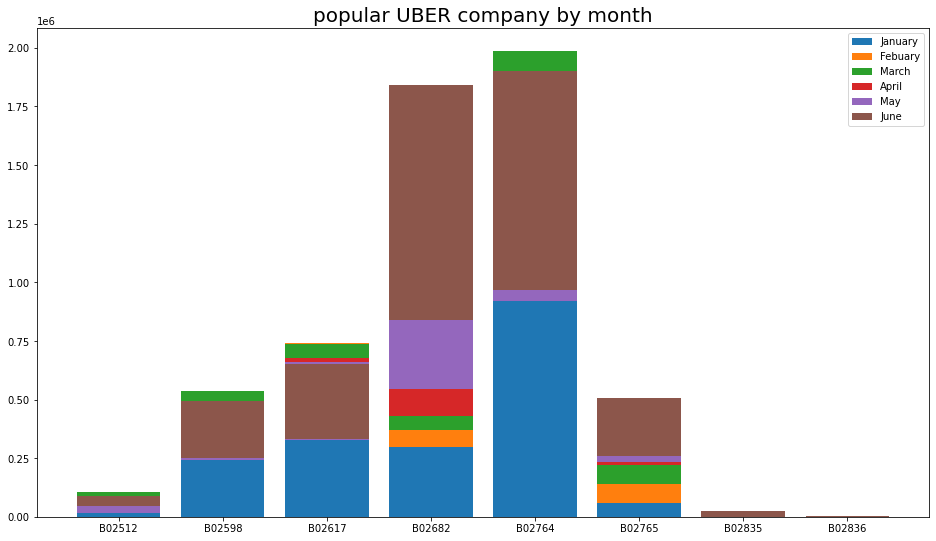

In [17]:
#visualize popular TLC company by every month
fig, ax = plt.subplots(figsize=(16, 9))

m_2015 = ['January', 'Febuary', 'March', 'April', 'May', 'June']
ax.bar(tlc_code_2015, base_every_m[0:8], label=m_2015[0])

for i in range(1, 6):
  ax.bar(tlc_code_2015, base_every_m[8*i:8*i+8], bottom =base_every_m[8*i-8:8*i], label =m_2015[i])

ax.legend()
ax.set_title("popular UBER company by month", size=20)
plt.show()

[46216, 54692, 50065, 14388, 45446, 44965]
[251620, 285622, 252211, 243488, 251846, 241873]
[354848, 386767, 348538, 326930, 331883, 319559]
[299371, 371094, 430120, 544313, 840476, 999156]
[944507, 1027330, 959768, 919556, 968730, 933762]
[57239, 138115, 219071, 232162, 257172, 248968]
[0, 0, 0, 0, 0, 26622]
[0, 0, 0, 0, 0, 1990]


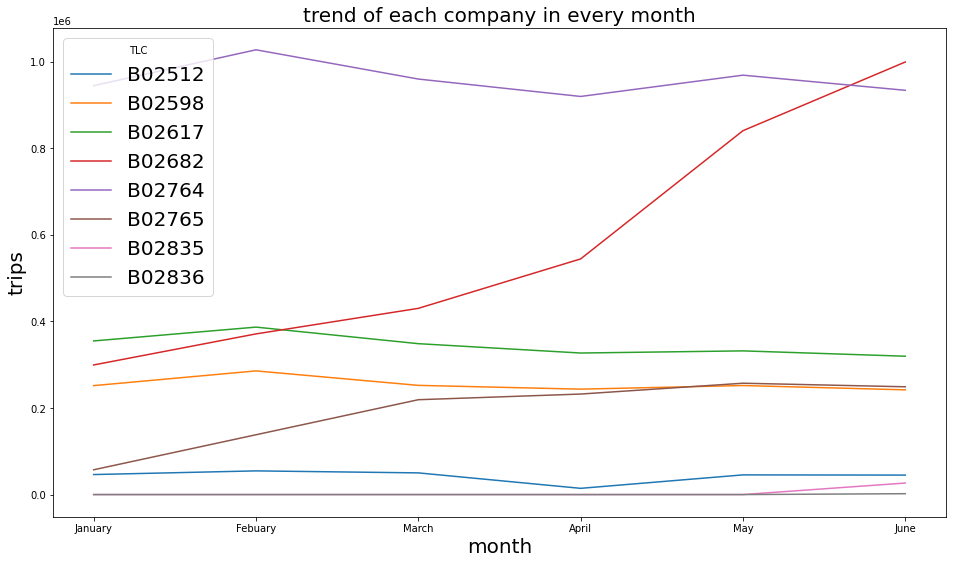

In [18]:
##trend for each TLC
plt.figure(figsize=(16, 9))
for i in range(8):
  y = [base_every_m[j*8+i] for j in range(6)]
  print(y)
  plt.plot(m_2015, y, label=tlc_code_2015[i])

plt.title("trend of each company in every month", fontsize=20)
plt.xlabel("month", fontsize=20)
plt.ylabel("trips", fontsize=20)
plt.legend(title='TLC', fontsize=20)
plt.show()

In [19]:
##there are 265 locations in NY, list[0] for nothing
## count total trip of each location
loc_cnt_2015 = [0]
for i in range(1, 266):
  loc_cnt_2015.append(len(df_2015_wo[df_2015_wo['locationID'] == i].index))

print(loc_cnt_2015)
print(len(loc_cnt_2015))

[0, 105, 8, 3684, 89319, 26, 662, 90870, 369, 3040, 6812, 3559, 2579, 139993, 35927, 3229, 8880, 80312, 6579, 3026, 9153, 8409, 10456, 925, 23717, 69154, 15760, 114, 11901, 4434, 64, 2299, 4031, 77788, 10294, 9889, 77482, 106234, 2209, 15382, 42831, 64767, 63011, 45720, 37, 43624, 321, 4294, 257091, 89762, 149228, 4078, 25702, 3598, 12364, 5164, 8367, 675, 684, 156, 2619, 105591, 24690, 5801, 2786, 54613, 52649, 9325, 299781, 8228, 12137, 12375, 13905, 3668, 50284, 51544, 15727, 4748, 5291, 407591, 118640, 3071, 22671, 8841, 39, 10336, 548, 154994, 57803, 46445, 225098, 15373, 18896, 5465, 2513, 41370, 550, 74649, 3990, 9, 157241, 1953, 8996, 0, 0, 12, 38124, 251499, 3848, 143, 2, 290, 137519, 246390, 206420, 511, 34290, 808, 764, 6203, 453, 13667, 1806, 17493, 5189, 125469, 3051, 15138, 1200, 36749, 15537, 6552, 289169, 12358, 11798, 11014, 4215, 123537, 266119, 2867, 126905, 198226, 198052, 113670, 255202, 80520, 20579, 2802, 252805, 8342, 4549, 58730, 17802, 2919, 684, 8954, 450, 14

10 most popular place to pickup in 2015
['JFK Airport', 'Murray Hill', 'Midtown North', 'East Chelsea', 'Times Sq/Theatre District', 'West Village', 'East Village', 'Union Sq', 'TriBeCa/Civic Center', 'Midtown Center']


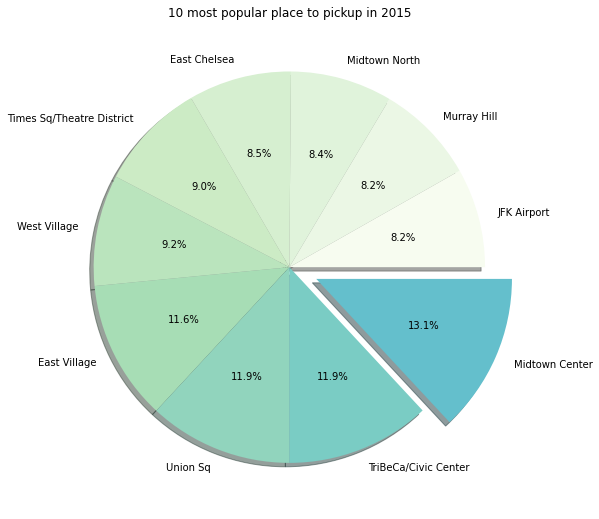

In [20]:
# make pie chart to show most popular 10 location in 2015
cmaps = OrderedDict()

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmap = plt.get_cmap(cmaps['Sequential'][12])
#testi = np.zeros(10, dtype=int)
testi = [i*16 for i in range(10)]

plt.figure(figsize=(16, 9))
loc_sort = sorted(loc_cnt_2015)
loc_max_cnt = loc_sort[-10:]
explode = [0]*10
explode[-1] = .15

max_10_loc = []
for i in range(10):
  max_10_loc.append(loc_lookup_df.iloc[loc_cnt_2015.index(loc_max_cnt[i])-1]['Zone'])

print("10 most popular place to pickup in 2015")
print(max_10_loc)

plt.pie(loc_max_cnt, explode=explode, labels=max_10_loc, shadow=True, colors=cmap(testi), autopct='%1.1f%%')
plt.title("10 most popular place to pickup in 2015")
plt.show()

266
265
[(0, "Governor's Island/Ellis Island/Liberty Island"), (0, 'Rikers Island'), (2, 'Great Kills Park'), (7, 'Unknown'), (8, 'Jamaica Bay'), (9, 'Freshkills Park'), (12, "Governor's Island/Ellis Island/Liberty Island"), (24, 'Rossville/Woodrow'), (26, 'Arden Heights'), (37, 'Charleston/Tottenville')]


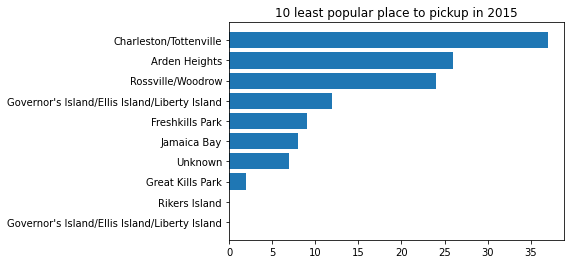

In [21]:
# make bar chart to show most least 10 location in 2015
print(len(loc_cnt_2015))
print(len(loc_lookup_df['Zone'].values))
tmp = list(loc_lookup_df['Zone'].values)
tmp.insert(0, 'None')
loc_lookup1 = zip(loc_cnt_2015, tmp)
loc_least_cnt = sorted(list(loc_lookup1))[:12]
del loc_least_cnt[1:3]
print(loc_least_cnt)
loc_name = []
loc_cnt = []
for i, j in loc_least_cnt:
  loc_name.append(j)
  loc_cnt.append(i)

plt.barh(range(10), loc_cnt)
plt.yticks(np.arange(10), loc_name)
plt.title("10 least popular place to pickup in 2015")
plt.show()

In [22]:
df_by_m[0]

,Dispatching_base_num,Pickup_date,locationID,Day,Hour,Month
336,B02598,2015-01-18 15:44:45,243,18,15,1
337,B02598,2015-01-18 05:13:29,107,18,5,1
338,B02598,2015-01-18 15:36:13,170,18,15,1
339,B02598,2015-01-18 00:02:54,144,18,0,1
340,B02598,2015-01-18 17:55:53,211,18,17,1
...,...,...,...,...,...,...
14239253,B02765,2015-01-04 13:35:16,249,4,13,1
14239254,B02765,2015-01-04 01:47:41,114,4,1,1
14239255,B02765,2015-01-04 19:27:16,224,4,19,1
14239256,B02765,2015-01-04 16:50:50,25,4,16,1


In [23]:
# why B02682 increase a lot

def get_tlc_rides(k, n):
  loc_by_m = [df_by_m[i][df_by_m[i]['Dispatching_base_num'] == tlc_code_2015[n]]['locationID'].values for i in range(6)]

  max_loc_by_m = []#location trips change by month
  max_trip_by_m = []#max k trips' amount
  loc_trip_dict = {}#max k trips' location
  for i in range(6):
    loc = df_by_m[i][df_by_m[i]['Dispatching_base_num'] == tlc_code_2015[n]]['locationID'].values
    loc_cnt = list(np.bincount(loc))
    loc_cnt_max = sorted(loc_cnt)[-k:] # most popular location in amount of trips
    m_popu = [loc_cnt.index(j) for j in loc_cnt_max] # most popular location
    max_loc_by_m.append(m_popu)
    max_trip_by_m.append(loc_cnt_max)
    for j in range(k):
      if max_loc_by_m[i][j] not in loc_trip_dict:
        loc_trip_dict[max_loc_by_m[i][j]] = [0]*6
      loc_trip_dict[max_loc_by_m[i][j]][i] = max_trip_by_m[i][j]
  
  return max_loc_by_m, max_trip_by_m, loc_trip_dict


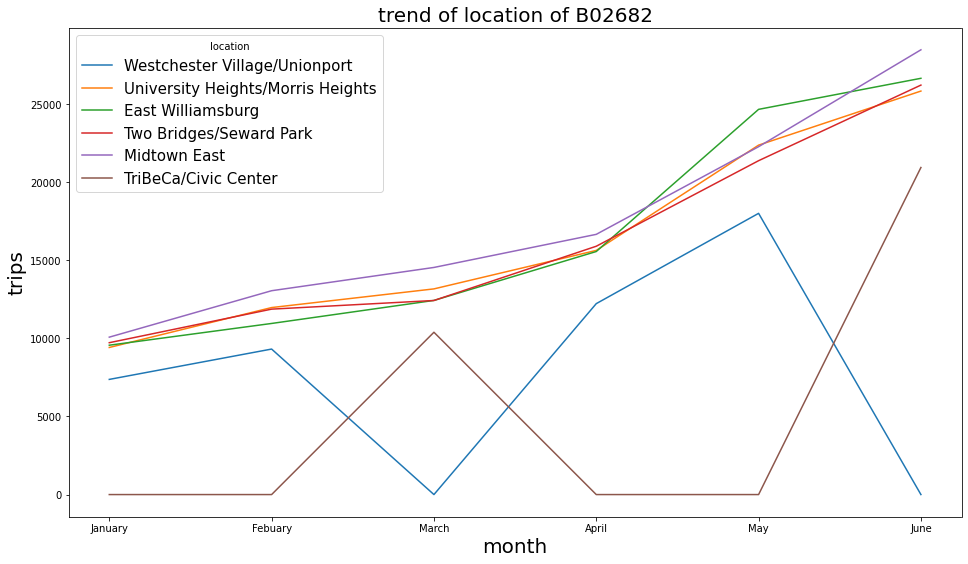

In [24]:
#['B02512' 'B02598' 'B02617' 'B02682' 'B02764' 'B02765' 'B02835' 'B02836'] for n
n = 3
k = 5
max_loc_by_m, max_trip_by_m, loc_trip_dict = get_tlc_rides(k, n)

##trend for each TLC
plt.figure(figsize=(16, 9))
for i in loc_trip_dict:
  y = loc_trip_dict[i]
  plt.plot(m_2015, y, label=zone_dict[i])

plt.title("trend of location of "+tlc_code_2015[n], fontsize=20)
plt.xlabel("month", fontsize=20)
plt.ylabel("trips", fontsize=20)
plt.legend(title='location', fontsize=15)
plt.show()

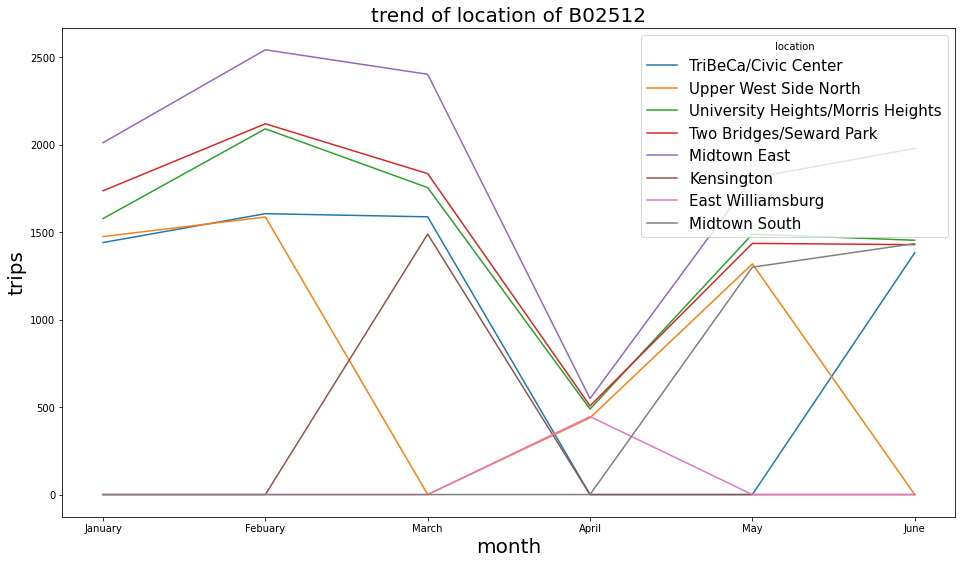

In [25]:
n = 0
k = 5
max_loc_by_m, max_trip_by_m, loc_trip_dict = get_tlc_rides(k, n)

##trend for each TLC
plt.figure(figsize=(16, 9))
for i in loc_trip_dict:
  y = loc_trip_dict[i]
  plt.plot(m_2015, y, label=zone_dict[i])

plt.title("trend of location of "+tlc_code_2015[n], fontsize=20)
plt.xlabel("month", fontsize=20)
plt.ylabel("trips", fontsize=20)
plt.legend(title='location', fontsize=15)
plt.show()

In [26]:
df_2015_wo

,Dispatching_base_num,Pickup_date,locationID,Day,Hour,Month
0,B02617,2015-05-17 09:47:00,141,17,9,5
1,B02617,2015-05-17 09:47:00,65,17,9,5
2,B02617,2015-05-17 09:47:00,100,17,9,5
3,B02617,2015-05-17 09:47:00,80,17,9,5
4,B02617,2015-05-17 09:47:00,90,17,9,5
...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,186,8,15,5
14270475,B02765,2015-05-08 15:43:00,263,8,15,5
14270476,B02765,2015-05-08 15:43:00,90,8,15,5
14270477,B02765,2015-05-08 15:44:00,45,8,15,5


In [27]:
trips_day = []
for i in range(1, 7):
  tmp_df = df_2015_wo[(df_2015_wo['Dispatching_base_num'] == 'B02682') & (df_2015_wo['Month'] == i)]
  for j in range(1, 32):
    trips_day.append(len(tmp_df[tmp_df['Day']==j].index))
    if i == 2 and j == 28:
      break
    elif i % 2 == 0 and j == 30:
      break

print(trips_day)
print(len(trips_day))

[7715, 5540, 8090, 5655, 6102, 7609, 9225, 10532, 10622, 11786, 8611, 9232, 9775, 9899, 10484, 11385, 11414, 11303, 7155, 8647, 9567, 10785, 11914, 13539, 9455, 7640, 4511, 10116, 11619, 13959, 15485, 12533, 12081, 12134, 11467, 13876, 14525, 13600, 10491, 10367, 10730, 12366, 14031, 16225, 16617, 14830, 11431, 11949, 11867, 14716, 16465, 16459, 11066, 11875, 12752, 12851, 13962, 15174, 14654, 11983, 9800, 13083, 12771, 13855, 14687, 14716, 11087, 9736, 12973, 11939, 13738, 14703, 17155, 11721, 10198, 11999, 13567, 14890, 18879, 16346, 13599, 11770, 12463, 14818, 15634, 17673, 19512, 15528, 13040, 16257, 14991, 16065, 16942, 15752, 13022, 12277, 15027, 16125, 17725, 18658, 19759, 15524, 13281, 14875, 15581, 18442, 20305, 23304, 18860, 19270, 16673, 20189, 22601, 24790, 27090, 21777, 16436, 17644, 19642, 21686, 26039, 30380, 22803, 18624, 21527, 23270, 25745, 26542, 30128, 24208, 21045, 23548, 25426, 28502, 30978, 38170, 29798, 23824, 26549, 28707, 29895, 28408, 26942, 23002, 20745, 237

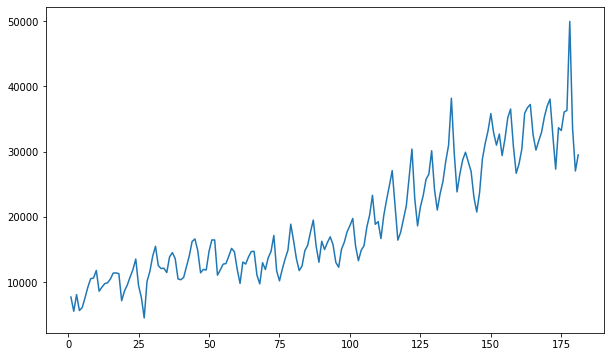

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 182), trips_day)
plt.show()

## 2015 summary


In [25]:
f_agg = ['other-FHV-services_jan-aug-2015.csv', 'Uber-Jan-Feb-FOIL.csv']
df_agg=[]
for i in f_agg:
    df_agg.append(pd.read_csv(path+i, encoding='Iso-8859-1'))

In [26]:
print(len(df_agg[1].index))
print(np.unique(df_agg[1]['dispatching_base_number']))
df_agg[1].head(10)

354
['B02512' 'B02598' 'B02617' 'B02682' 'B02764' 'B02765']


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
5,B02598,1/1/2015,870,6903
6,B02598,1/2/2015,785,4768
7,B02617,1/2/2015,1137,7065
8,B02512,1/2/2015,175,875
9,B02682,1/2/2015,890,5506


In [27]:
print(len(df_agg[0].index))
df_agg[0].head(10)

26181


,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62
5,B00221,PROFESSIONAL CAR SERVICE INC,01/01/2015,220,46
6,B00227,"PARK WEST EXEC. SERVICES, INC.",01/01/2015,36,28
7,B00248,YELLOWSTONE TRANSPORTATION INC.,01/01/2015,"1,137",106
8,B00254,XYZ TWO WAY RADIO,01/01/2015,236,103
9,B00280,FLEET RADIO DISPATCH CORP.,01/01/2015,47,29


## FHV dataset


In [ ]:
f_fhv = ['other-American_B01362.csv','other-Diplo_B01196.csv','other-Highclass_B01717.csv','other-Skyline_B00111.csv','other-Carmel_B00256.csv','other-Federal_02216.csv','other-Lyft_B02510.csv','other-Dial7_B00887.csv','other-Firstclass_B01536.csv','other-Prestige_B01338.csv']
list_fhv = ['American', 'Diplo', 'Highclass', 'Skyline', 'Carmel', 'Federal', 'Lyft', 'Dial7', 'Firstclass', 'Prestige']
df_fhv=[]
for i in range(len(f_fhv)):
  df = pd.read_csv(path+f_fhv[i], encoding='Iso-8859-1')
  print("size of {0} is: {1}".format(list_fhv[i], len(df.index)))
  df_fhv.append(df)
df_fhv[0].head(5)

size of American is: 91712
size of Diplo is: 98550
size of Highclass is: 151925
size of Carmel is: 256519
size of Federal is: 276
size of Lyft is: 267701
size of Dial7 is: 194992
size of Firstclass is: 166769
size of Prestige is: 320641


,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",NaN,NaN,NaN
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN
